# Examining The Embeddings of Model 1 Type Submissions

Upon further testing the of model 1, it seems that the efficacy of the model is
dependent on which of the support samples get selected for inference. This  
is less than ideal, as we would like the model to be deterministic at inference time.  

To that end, this notebook will examine the embeddings from the submitted model to see what simple consistent subset can be used.


In [12]:
import matplotlib.pyplot as plt
import numpy as np
import trimap
import umap

2023-03-07 09:13:27.938293: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [40]:
roberta_mask_embeddings = np.load(
    "../models/generic_model1/sub_biomed_roberta/embeddings/support_mask_embeddings.npy"
)

roberta_nomask_embeddings = np.load(
    "../models/generic_model1/sub_biomed_roberta/embeddings/support_nomask_embeddings.npy"
)

samples = np.concatenate(
    [
        roberta_mask_embeddings, 
        roberta_nomask_embeddings,
    ],
    axis=0
)

labels = np.concatenate(
    [
        np.ones(roberta_mask_embeddings.shape[0]),
        np.zeros(roberta_nomask_embeddings.shape[0]),
    ]
)

In [46]:
tmap_embedding = trimap.TRIMAP().fit_transform(samples)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


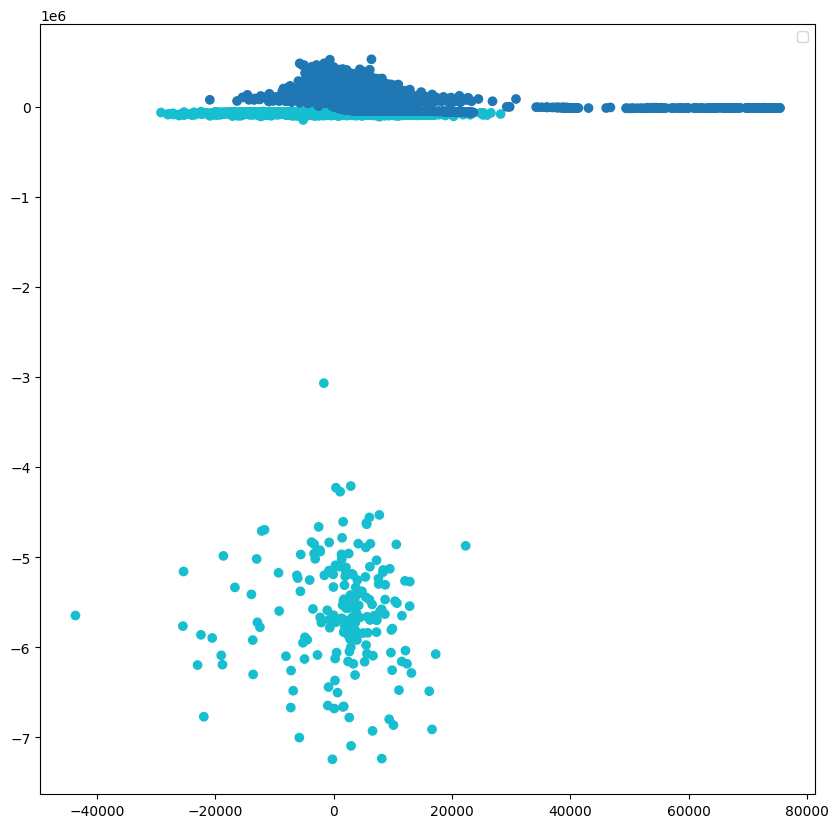

In [47]:
f, ax = plt.subplots(figsize=(10, 10))
ax.scatter(tmap_embedding[:, 1], tmap_embedding[:, 0], c=labels, cmap="tab10")
ax.legend()
plt.show()

It looks like there are some outliers at approx -6 million in the y-axis.
Let's try excluding those and look at the separation of the points closer
to each other. 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[79858.33      -92.49817] [-74164.62     -867.0532]


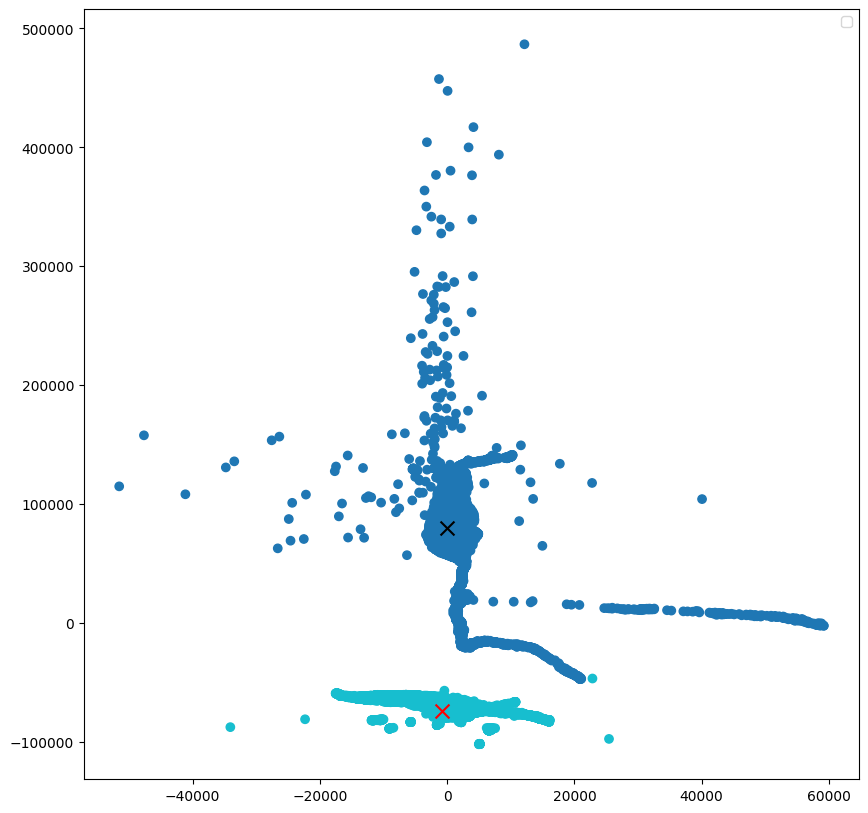

In [33]:
mask = tmap_embedding[:, 0] > -0.5e6

mean_class_0 = np.mean(tmap_embedding[np.logical_and(
    mask, labels == 0
), :], axis=0)

mean_class_1 = np.mean(tmap_embedding[np.logical_and(
    mask, labels == 1
), :], axis=0)

print(mean_class_0, mean_class_1)

f, ax = plt.subplots(figsize=(10, 10))
ax.scatter(tmap_embedding[mask, 1], tmap_embedding[mask, 0], c=labels[mask], cmap="tab10")
ax.scatter(mean_class_0[1], mean_class_0[0], marker="x", c="k", s=100)
ax.scatter(mean_class_1[1], mean_class_1[0], marker="x", c="r", s=100)
ax.legend()
plt.show()

Let's try UMAP. Also let's see if the outliers found by trimap are also outliers in the UMAP space.

In [27]:
umap_embeddings = umap.UMAP(
).fit_transform(
    np.concatenate(
        [roberta_mask_embeddings, roberta_nomask_embeddings]
    )
)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


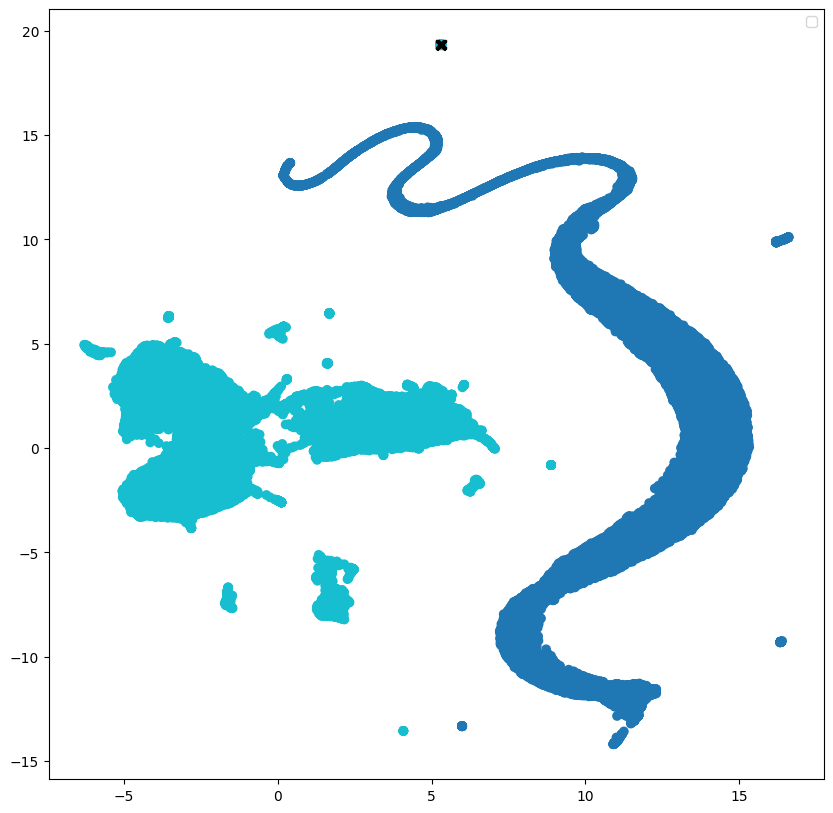

In [36]:
f, ax = plt.subplots(figsize=(10, 10))
ax.scatter(umap_embeddings[:, 0], umap_embeddings[:, 1], c=labels, cmap="tab10")
ax.scatter(umap_embeddings[~mask, 0], umap_embeddings[~mask, 1], marker="x", c="k")

ax.legend()
plt.show()

Trimap seems to have captured outliers that are represented in both reductions. The trimap representation is more compact, so let's use that. can we recover the approximate mean without manually plotting the points? 

In [48]:
mean_samples = np.concatenate(
    [
        np.mean(roberta_mask_embeddings, axis=0, keepdims=True), 
        np.mean(roberta_nomask_embeddings, axis=0, keepdims=True),
    ],
    axis=0
)

augmented_samples = np.concatenate(
    [
        samples,
        mean_samples,
    ],
    axis=0
)

augmented_labels = np.concatenate(
    [
        labels,
        np.array([1, 0]),
    ],
    axis=0
)

augmented_tmap_embedding = trimap.TRIMAP().fit_transform(augmented_samples)

In [54]:
augmented_samples.shape, augmented_tmap_embedding.shape, augmented_labels.shape

((143256, 768), (143256, 2), (143256,))

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[8.6787453e+04 2.2214935e+01] [-74050.36     -432.4454]


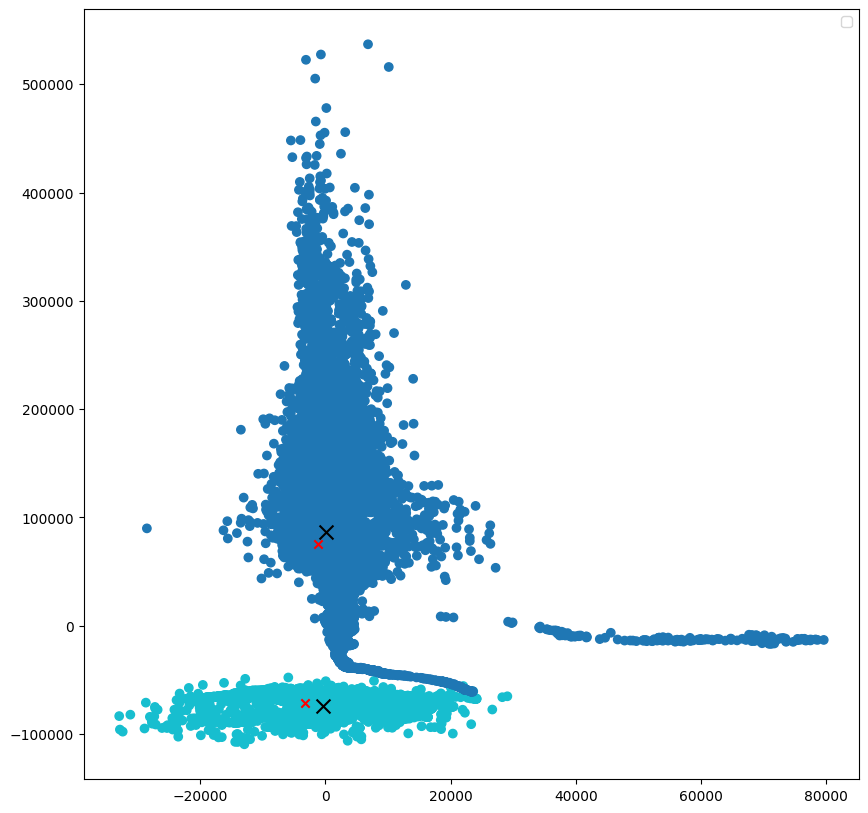

In [57]:
mask = augmented_tmap_embedding[:, 0] > -0.5e6

mean_class_0 = np.mean(augmented_tmap_embedding[np.logical_and(
    mask, augmented_labels == 0
), :], axis=0)

mean_class_1 = np.mean(augmented_tmap_embedding[np.logical_and(
    mask, augmented_labels == 1
), :], axis=0)

print(mean_class_0, mean_class_1)

f, ax = plt.subplots(figsize=(10, 10))
ax.scatter(augmented_tmap_embedding[mask, 1], augmented_tmap_embedding[mask, 0], c=augmented_labels[mask], cmap="tab10")
ax.scatter(mean_class_0[1], mean_class_0[0], marker="x", c="k", s=100)
ax.scatter(mean_class_1[1], mean_class_1[0], marker="x", c="k", s=100)
ax.scatter(augmented_tmap_embedding[-1, 1], augmented_tmap_embedding[-1, 0], marker="x", c="r")
ax.scatter(augmented_tmap_embedding[-2, 1], augmented_tmap_embedding[-2, 0], marker="x", c="r")
ax.legend()
plt.show()

# The SciBert Embeddings

In [58]:
scibert_mask_embeddings = np.load(
    "../models/generic_model1/sub_scibert/embeddings/support_mask_embeddings.npy"
)

scibert_nomask_embeddings = np.load(
    "../models/generic_model1/sub_scibert/embeddings/support_nomask_embeddings.npy"
)

samples = np.concatenate(
    [
        scibert_mask_embeddings, 
        scibert_nomask_embeddings,
    ],
    axis=0
)

labels = np.concatenate(
    [
        np.ones(scibert_mask_embeddings.shape[0]),
        np.zeros(scibert_nomask_embeddings.shape[0]),
    ]
)

In [59]:
tmap_embedding = trimap.TRIMAP().fit_transform(samples)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


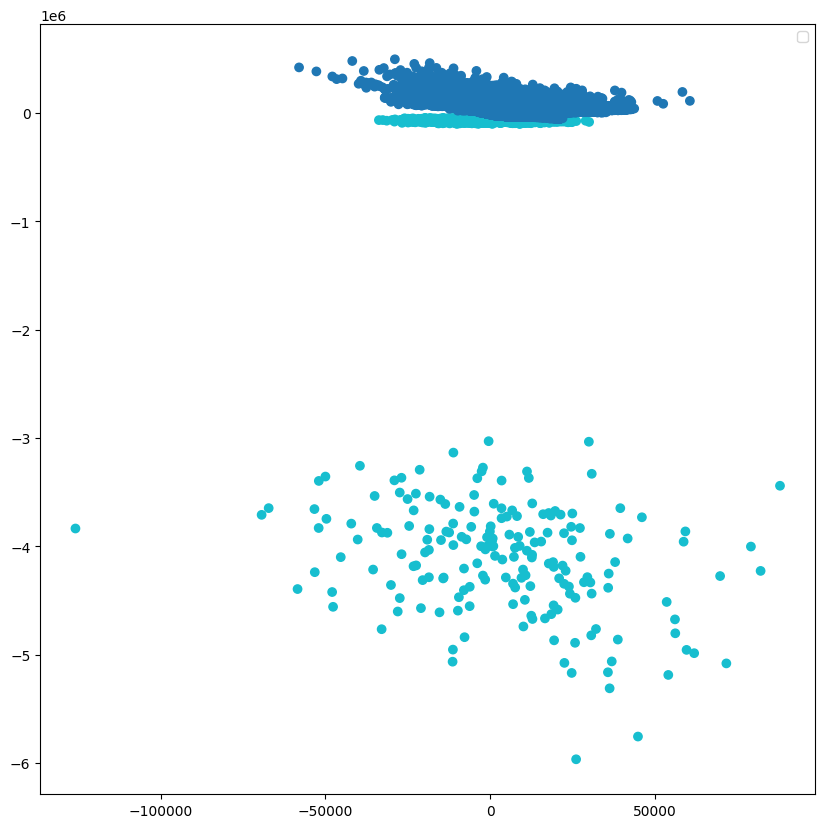

In [60]:
f, ax = plt.subplots(figsize=(10, 10))
ax.scatter(tmap_embedding[:, 1], tmap_embedding[:, 0], c=labels, cmap="tab10")
ax.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[76228.414   1103.6345] [-65990.09    -856.387]


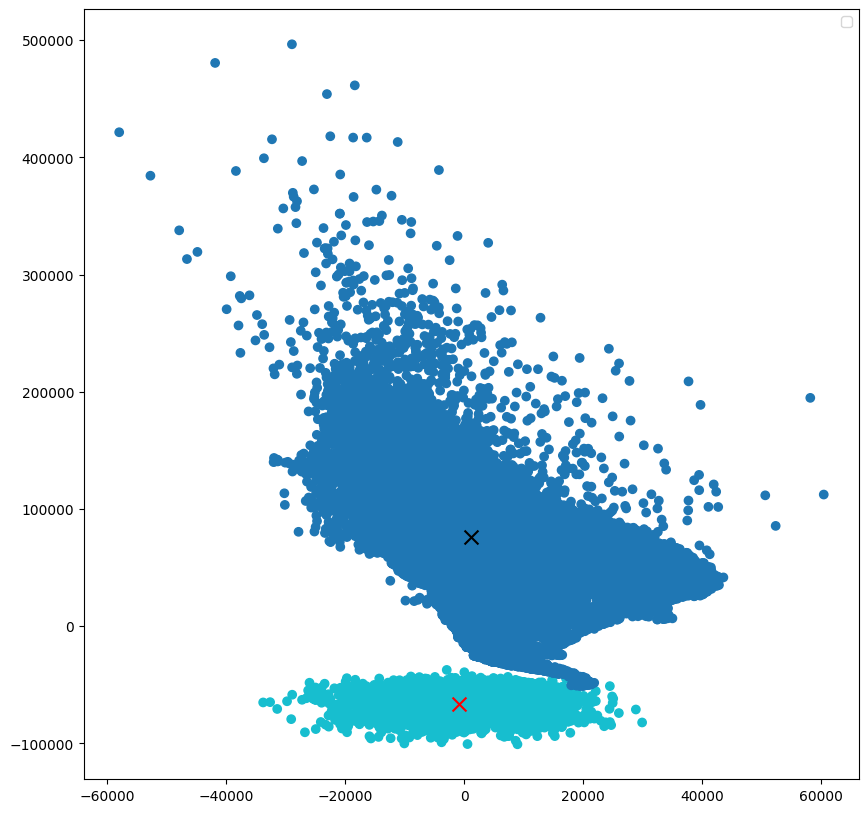

In [61]:
mask = tmap_embedding[:, 0] > -0.5e6

mean_class_0 = np.mean(tmap_embedding[np.logical_and(
    mask, labels == 0
), :], axis=0)

mean_class_1 = np.mean(tmap_embedding[np.logical_and(
    mask, labels == 1
), :], axis=0)

print(mean_class_0, mean_class_1)

f, ax = plt.subplots(figsize=(10, 10))
ax.scatter(tmap_embedding[mask, 1], tmap_embedding[mask, 0], c=labels[mask], cmap="tab10")
ax.scatter(mean_class_0[1], mean_class_0[0], marker="x", c="k", s=100)
ax.scatter(mean_class_1[1], mean_class_1[0], marker="x", c="r", s=100)
ax.legend()
plt.show()